In [8]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import KFold


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

SEED=42
cpu=-1
datasetFolder=os.path.dirname(os.path.dirname(os.getcwd()))

def predict_score(model,x_train,y_train,x_test,y_test,name):
    model.fit(x_train,y_train)
    #estimator=model.best_estimator_
    #features=estimator.named_steps["feature_selection"].get_feature_names_out(input_features=x_train.columns)
    y_predict=model.predict(x_test)
    f1=f1_score(y_test,y_predict)
    auc_score=roc_auc_score(y_test,y_predict)
    a=1
    return f1,auc_score,a #,features
    
def baseDataSet(x_train,x_test):
    new_x_train=x_train[['fanin_x', 'fanout_x', 'wmc_x', 'loc_x', 'returnsQty_x', 'variablesQty_x', 'parametersQty_x', 'loopQty_x', 'anonymousClassesQty_x', 'innerClassesQty_x']]
    new_x_test=x_test[['fanin_x', 'fanout_x', 'wmc_x', 'loc_x', 'returnsQty_x', 'variablesQty_x', 'parametersQty_x', 'loopQty_x', 'anonymousClassesQty_x', 'innerClassesQty_x']]
    return new_x_train,new_x_test

def addMetricsDataSet(x_train,x_test):
    new_x_train=x_train[['fanin_x', 'fanout_x', 'wmc_x', 'loc_x', 'returnsQty_x', 'variablesQty_x', 'parametersQty_x', 'loopQty_x', 'anonymousClassesQty_x', 'innerClassesQty_x', 'ATFD_x', 'ATLD_x', 'LAA_x', 'FDP_x']]
    new_x_test=x_test[['fanin_x', 'fanout_x', 'wmc_x', 'loc_x', 'returnsQty_x', 'variablesQty_x', 'parametersQty_x', 'loopQty_x', 'anonymousClassesQty_x', 'innerClassesQty_x', 'ATFD_x', 'ATLD_x', 'LAA_x', 'FDP_x']]
    return new_x_train,new_x_test

def baseVersionDataSet(x_train,x_test):
    new_x_train=x_train[['fanin_x', 'fanout_x', 'wmc_x', 'loc_x', 'returnsQty_x', 'variablesQty_x', 'parametersQty_x', 'loopQty_x', 'anonymousClassesQty_x', 'innerClassesQty_x','fanin_y', 'fanout_y', 'wmc_y', 'loc_y', 'returnsQty_y', 'variablesQty_y', 'parametersQty_y', 'loopQty_y', 'anonymousClassesQty_y', 'innerClassesQty_y']]
    new_x_test=x_test[['fanin_x', 'fanout_x', 'wmc_x', 'loc_x', 'returnsQty_x', 'variablesQty_x', 'parametersQty_x', 'loopQty_x', 'anonymousClassesQty_x', 'innerClassesQty_x', 'fanin_y', 'fanout_y', 'wmc_y', 'loc_y', 'returnsQty_y', 'variablesQty_y', 'parametersQty_y', 'loopQty_y', 'anonymousClassesQty_y', 'innerClassesQty_y']]
    return new_x_train,new_x_test

def addMetricsVersionDataSet(x_train,x_test):
    new_x_train=x_train[['fanin_x', 'fanout_x', 'wmc_x', 'loc_x', 'returnsQty_x', 'variablesQty_x', 'parametersQty_x', 'loopQty_x', 'anonymousClassesQty_x', 'innerClassesQty_x', 'ATFD_x', 'ATLD_x', 'LAA_x', 'FDP_x', 'fanin_y', 'fanout_y', 'wmc_y', 'loc_y', 'returnsQty_y', 'variablesQty_y', 'parametersQty_y', 'loopQty_y', 'anonymousClassesQty_y', 'innerClassesQty_y', 'ATFD_y', 'ATLD_y', 'LAA_y', 'FDP_y']]
    new_x_test=x_test[['fanin_x', 'fanout_x', 'wmc_x', 'loc_x', 'returnsQty_x', 'variablesQty_x', 'parametersQty_x', 'loopQty_x', 'anonymousClassesQty_x', 'innerClassesQty_x', 'ATFD_x', 'ATLD_x', 'LAA_x', 'FDP_x', 'fanin_y', 'fanout_y', 'wmc_y', 'loc_y', 'returnsQty_y', 'variablesQty_y', 'parametersQty_y', 'loopQty_y', 'anonymousClassesQty_y', 'innerClassesQty_y', 'ATFD_y', 'ATLD_y', 'LAA_y', 'FDP_y']]
    return new_x_train,new_x_test


def overSampling(x_train,y_train):
    x_sampling,y_sampling=SMOTE(sampling_strategy=0.2,random_state=SEED).fit_resample(x_train,y_train)
    return x_sampling,y_sampling

In [9]:
LongMethodFile=os.path.join(datasetFolder,"dataset2\\LongMethod.csv")
factors=["fanin","fanout","wmc","loc","returnsQty","variablesQty","parametersQty","loopQty","anonymousClassesQty","innerClassesQty","ATFD","ATLD","LAA","FDP",]
df=pd.read_csv(LongMethodFile,encoding_errors="replace")
df=df.dropna(how="any")
x=df.drop(columns=["file","class","method","qualifiedName","LongMethod"])
for factor in factors:
    df[factor+"_y"]=df[factor+"_x"]-df[factor+"_y"]
y=df[["LongMethod"]].values.ravel()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=SEED)
x_sampling,y_sampling=overSampling(x_train,y_train)

x_base_train,x_base_test=baseDataSet(x_sampling,x_test)
y_base_train=y_sampling
y_base_test=y_test
base_score={"f1":[],"auc":[],"feature":[]}
#x_train_base,y_train_base,x_test_base,y_test_base,features_base=create_train_test_data(x_base,y_base)

x_add_train,x_add_test=addMetricsDataSet(x_sampling,x_test)
y_add_train=y_sampling
y_add_test=y_test
add_score={"f1":[],"auc":[],"feature":[]}

#x_train_add,y_train_add,x_test_add,y_test_add,features_add=create_train_test_data(x_add,y_add)

x_baseVersion_train,x_baseVersion_test=baseVersionDataSet(x_sampling,x_test)
y_baseVersion_train=y_sampling
y_baseVersion_test=y_test
baseVersion_score={"f1":[],"auc":[],"feature":[]}

x_addVersion_train,x_addVersion_test=addMetricsVersionDataSet(x_sampling,x_test)
y_addVersion_train=y_sampling
y_addVersion_test=y_test
addVersion_score={"f1":[],"auc":[],"feature":[]}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


name="KNN"
KNN_prameter={
    'classifier__n_neighbors': range(1, 21, 2),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
    }

k_range=np.arange(1,11,1)
for i in k_range:
    pipline=Pipeline([
        ("polynomial_features",PolynomialFeatures(degree=2)),
        ("minmaxscaler",MinMaxScaler()),
        ("feature_selection",SelectKBest(score_func=f_classif,k=i)),
        ("classifier",KNeighborsClassifier())
    ])
    KNN_model=RandomizedSearchCV(pipline, param_distributions=KNN_prameter,cv=KFold(n_splits=10,shuffle=True,random_state=SEED),random_state=SEED,n_jobs=cpu)
    print(str(i))
    f1_base,auc_base,feature_base=predict_score(KNN_model,x_base_train,y_base_train,x_base_test,y_base_test,name)
    base_score["f1"].append(f1_base)
    base_score["auc"].append(auc_base)
    base_score["feature"].append(feature_base)
    
    f1_add,auc_add,feature_add=predict_score(KNN_model,x_add_train,y_add_train,x_add_test,y_add_test,name)
    add_score["f1"].append(f1_add)
    add_score["auc"].append(auc_add)
    add_score["feature"].append(feature_add)
    
    f1_baseVersion,auc_baseVersion,feature_baseVersion=predict_score(KNN_model,x_baseVersion_train,y_baseVersion_train,x_baseVersion_test,y_baseVersion_test,name)
    baseVersion_score["f1"].append(f1_baseVersion)
    baseVersion_score["auc"].append(auc_baseVersion)
    baseVersion_score["feature"].append(feature_baseVersion)

    f1_addVersion,auc_addVersion,feature_addVersion=predict_score(KNN_model,x_addVersion_train,y_addVersion_train,x_addVersion_test,y_addVersion_test,name)
    addVersion_score["f1"].append(f1_addVersion)
    addVersion_score["auc"].append(auc_addVersion)   
    addVersion_score["feature"].append(feature_addVersion)

    #features_baselist.append(baseDF.columns[features_base])
    #features_addlist.append(addMetricsDF.columns[features_add])


1


ValueError: Invalid parameter 'weights' for estimator Pipeline(steps=[('polynomial_features', PolynomialFeatures()),
                ('minmaxscaler', MinMaxScaler()),
                ('feature_selection', SelectKBest(k=np.int64(1))),
                ('classifier', KNeighborsClassifier())]). Valid parameters are: ['memory', 'steps', 'transform_input', 'verbose'].

base
f1 :  0.08403361344537816
auc_score :  0.6275663806958371
Index(['dit_x', 'fanin_x', 'fanout_x', 'rfc_x', 'wmc_x'], dtype='object')

addMetrics
f1 :  0.10569105691056911
auc_score :  0.6700273898182312
Index(['dit_x', 'fanout_x', 'rfc_x', 'BOvR_x', 'BUR_x'], dtype='object')

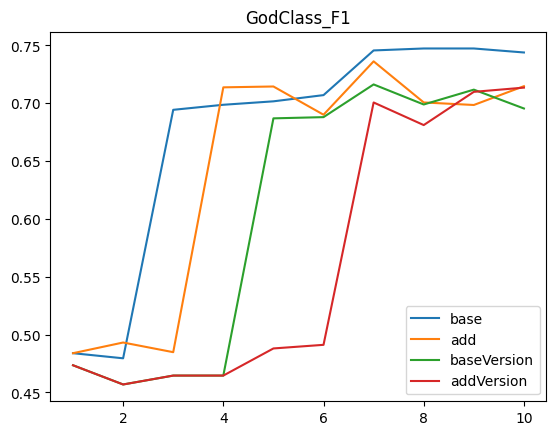

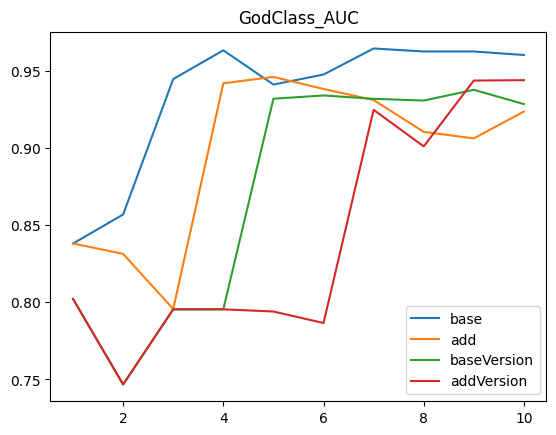

In [ ]:
import matplotlib.pyplot as plt

x=k_range
plt.title("LongMethod_F1")
plt.plot(x,base_score["f1"],label="base")
plt.plot(x,add_score["f1"],label="add")
plt.plot(x,baseVersion_score["f1"],label="baseVersion")
plt.plot(x,addVersion_score["f1"],label="addVersion")
plt.legend()
plt.show()

plt.title("LongMethod_AUC")
plt.plot(x,base_score["auc"],label="base")
plt.plot(x,add_score["auc"],label="add")
plt.plot(x,baseVersion_score["auc"],label="baseVersion")
plt.plot(x,addVersion_score["auc"],label="addVersion")
plt.legend()
plt.show()

多項式化あり
base :  {'f1': [0.4838709677419355, 0.5208333333333334, 0.544, 0.68, 0.6783216783216783, 0.6713780918727915, 0.6735395189003437, 0.7244367417677643, 0.718213058419244, 0.6967071057192374], 'auc': [np.float64(0.8381380370216882), np.float64(0.8617082815305982), np.float64(0.8541882511396601), np.float64(0.9335888934935767), np.float64(0.9131354468849289), np.float64(0.9045275590551182), np.float64(0.9168652438182069), np.float64(0.9468503937007874), np.float64(0.9464402887139106), np.float64(0.9286503660726619)]}
add :  {'f1': [0.4838709677419355, 0.5208333333333334, 0.544, 0.6836734693877551, 0.6713780918727915, 0.6529209621993127, 0.6380789022298456, 0.658578856152513, 0.6521739130434783, 0.6545454545454545], 'auc': [np.float64(0.8381380370216882), np.float64(0.8617082815305982), np.float64(0.8541882511396601), np.float64(0.9277481351015333), np.float64(0.9045275590551182), np.float64(0.903215223097113), np.float64(0.8940331882856749), np.float64(0.9036253280839895), np.float64(0.8829258184832159), np.float64(0.8830898604779666)]}
baseVersion :  {'f1': [0.47342995169082125, 0.45681381957773515, 0.5145631067961165, 0.5186385737439222, 0.511326860841424, 0.5129032258064516, 0.5374592833876222, 0.5413290113452188, 0.5342237061769616, 0.5308848080133556], 'auc': [np.float64(0.8021912556983009), np.float64(0.7466932587373948), np.float64(0.8297373601326148), np.float64(0.8320943845835059), np.float64(0.8274623566790994), np.float64(0.8295733181378643), np.float64(0.8437154648432105), np.float64(0.8480194087581158), np.float64(0.8335707625362619), np.float64(0.8312957590827461)]}
addVersion :  {'f1': [0.47342995169082125, 0.45681381957773515, 0.5145631067961165, 0.5186385737439222, 0.511326860841424, 0.5129032258064516, 0.5374592833876222, 0.5413290113452188, 0.5342237061769616, 0.5308848080133556], 'auc': [np.float64(0.8021912556983009), np.float64(0.7466932587373948), np.float64(0.8297373601326148), np.float64(0.8320943845835059), np.float64(0.8274623566790994), np.float64(0.8295733181378643), np.float64(0.8437154648432105), np.float64(0.8480194087581158), np.float64(0.8335707625362619), np.float64(0.8312957590827461)]}